<h2 style="font-family:Comic Sans MS; color:#2bb5bd">1. WhatsApp Business Analysis</h2>

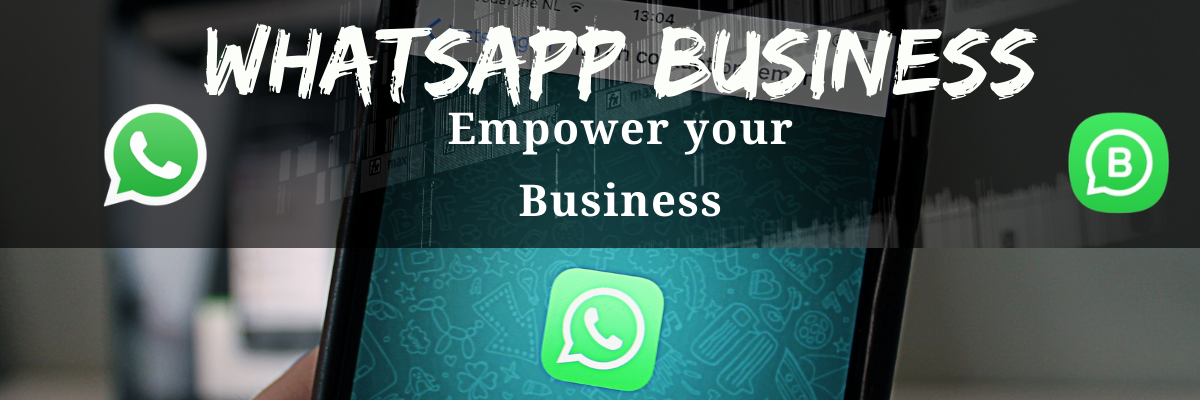
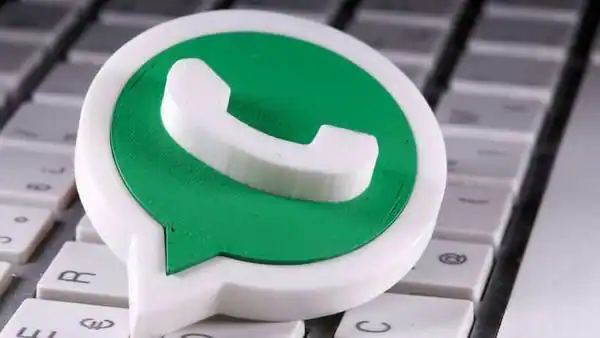

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">2. Import Dataset</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pprint
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">3. Load the Dataset</h2>

In [2]:
df = pd.read_csv("./data/hashed_wab_reviews.csv")

In [3]:
df.head()

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
2,10932303253,2024-02-12T15:54:56-07:00,ee939200223a21c2bdea5d17ef0ae2d9a03acfbb914c73...,1c044d9599692ebd0d50f4fb8d886f622ee02c549d76f8...,24.3.76,4,Recommendations,I like being to have a separate account/app fo...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
3,10859859638,2024-01-24T12:47:22-07:00,10c5a49c9a79ddf4cd973abd6f125b5bf98d9e6cf22fbd...,f713d7f8bf1c1400a223d76013914de72a242f8113163a...,24.1.80,5,Subject: Request for Premium Features in Whats...,"Dear WhatsApp Support Team,\n\nI hope this mes...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
4,10758670982,2023-12-29T05:13:49-07:00,83481ba5686098a9f7b2b9e374dc5ed7a3627bcd5eb28f...,59528539b374bc7bc8941a2785953ba58da70690e9fdd8...,23.25.86,2,Not satisfied yet,Only seems like someone clicks on your ad when...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">4. Data Cleaning</h2>

In [4]:
df.shape

(1459, 11)

In [5]:
df.columns

Index(['id', 'date', 'userName', 'userUrl', 'version', 'score', 'title',
       'text', 'url', 'country', 'appId'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1459 non-null   int64 
 1   date      1459 non-null   object
 2   userName  1459 non-null   object
 3   userUrl   1459 non-null   object
 4   version   1459 non-null   object
 5   score     1459 non-null   int64 
 6   title     1459 non-null   object
 7   text      1459 non-null   object
 8   url       1459 non-null   object
 9   country   1459 non-null   object
 10  appId     1459 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 125.5+ KB


In [8]:
df.describe()

,id,score,appId
count,1.459000e+03,1459.000000,1.459000e+03
mean,9.372247e+09,3.133653,1.386413e+09
std,1.782619e+09,1.764405,0.000000e+00
min,3.993157e+09,1.000000,1.386413e+09
25%,8.411967e+09,1.000000,1.386413e+09
50%,1.028037e+10,3.000000,1.386413e+09
75%,1.065195e+10,5.000000,1.386413e+09
max,1.101599e+10,5.000000,1.386413e+09


In [10]:
df.isna().sum()

id          0
date        0
userName    0
userUrl     0
version     0
score       0
title       0
text        0
url         0
country     0
appId       0
dtype: int64

In [11]:
df.duplicated().sum()

368

In [12]:
# Remove duplicated entries
df = df.drop_duplicates()

# Confirm that duplicates have been removed
print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates after removal: 0


<h2 style="font-family:Comic Sans MS; color:#2bb5bd">5. Plot the Data</h2>

C:\Users\Welcome\AppData\Local\Temp\ipykernel_1020\2597006270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='viridis')


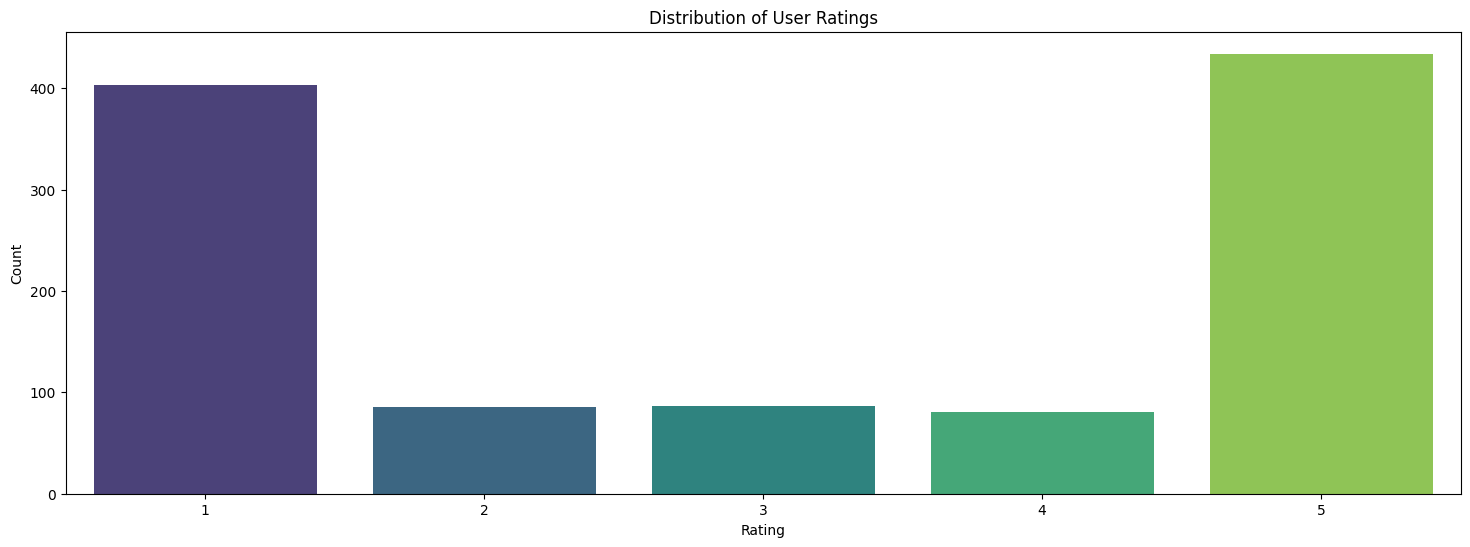

In [13]:
# Plotting the distribution of user ratings
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='score', palette='viridis')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_1020\3408313067.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='score', palette='Set2')


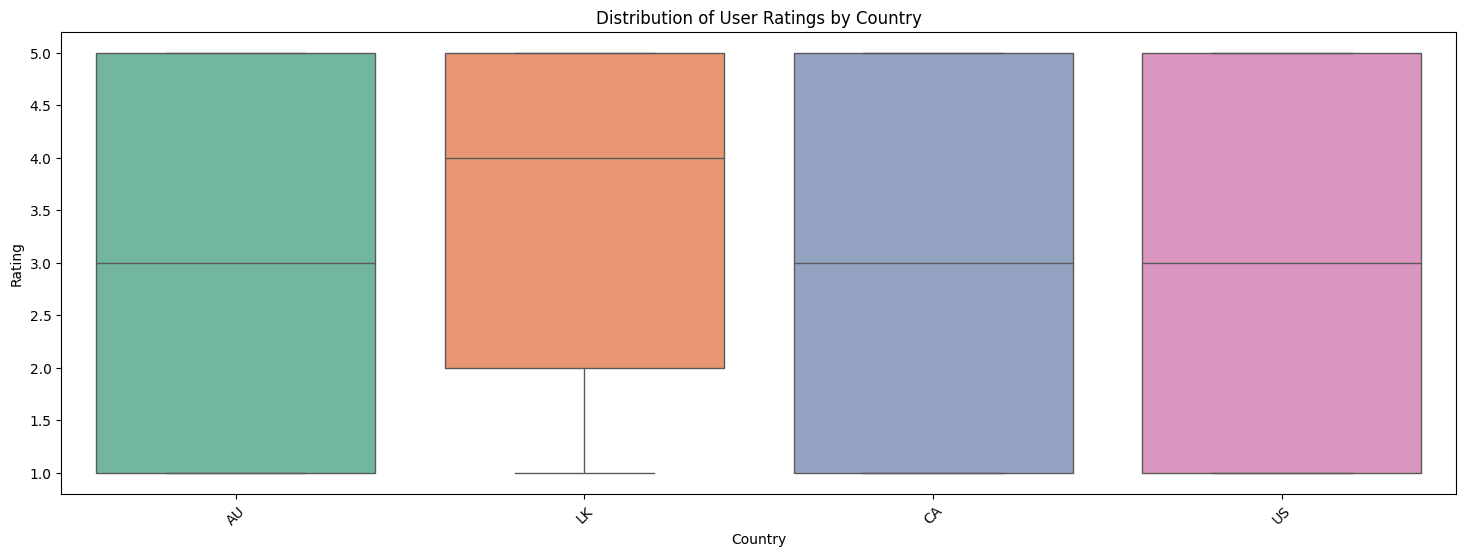

In [14]:
# Plotting the distribution of user ratings by country
plt.figure(figsize=(18, 6))
sns.boxplot(data=df, x='country', y='score', palette='Set2')
plt.title('Distribution of User Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

C:\Users\Welcome\AppData\Local\Temp\ipykernel_1020\2508338089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)  # This line was modified


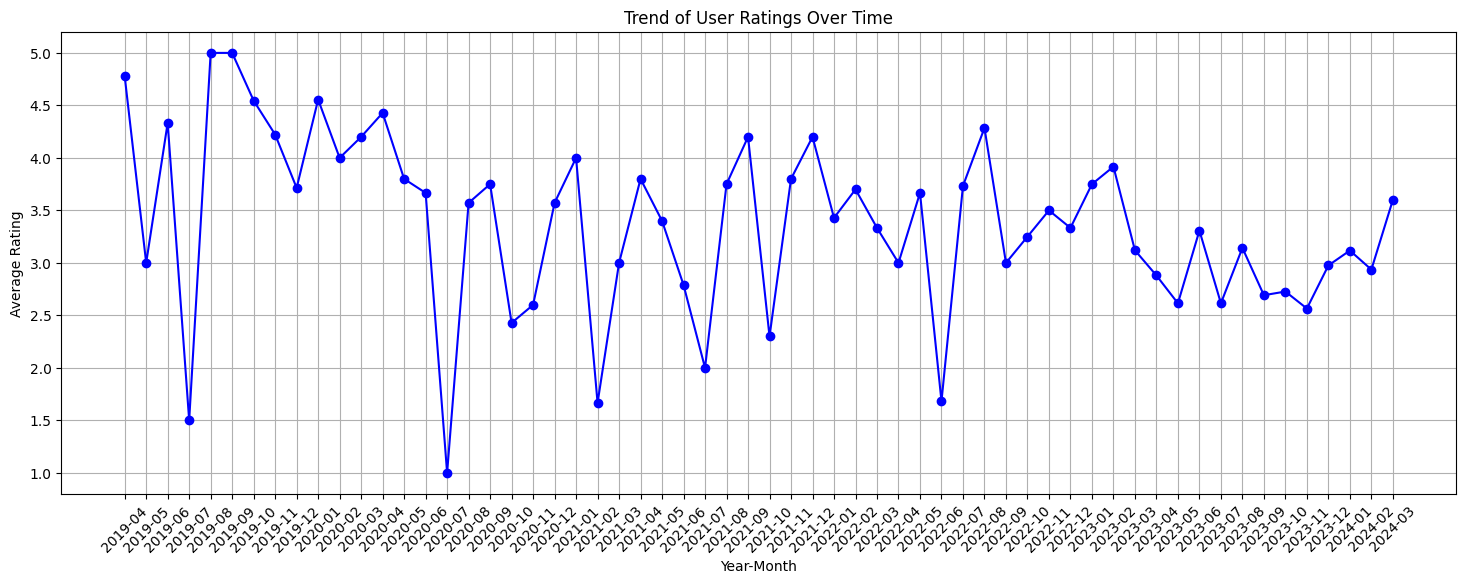

In [15]:
# Convert 'date' column to datetime format and make it timezone-aware
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.tz_localize(None)  # This line was modified

# Drop rows with missing date values
df = df.dropna(subset=['date'])

# Extract year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Group by year_month and calculate the mean score
ratings_over_time = df.groupby('year_month')['score'].mean().reset_index()

# Convert 'year_month' column to string
ratings_over_time['year_month'] = ratings_over_time['year_month'].astype(str)

# Plot the trend of user ratings over time
plt.figure(figsize=(18, 6))
plt.plot(ratings_over_time['year_month'], ratings_over_time['score'], marker='o', color='blue')
plt.title('Trend of User Ratings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

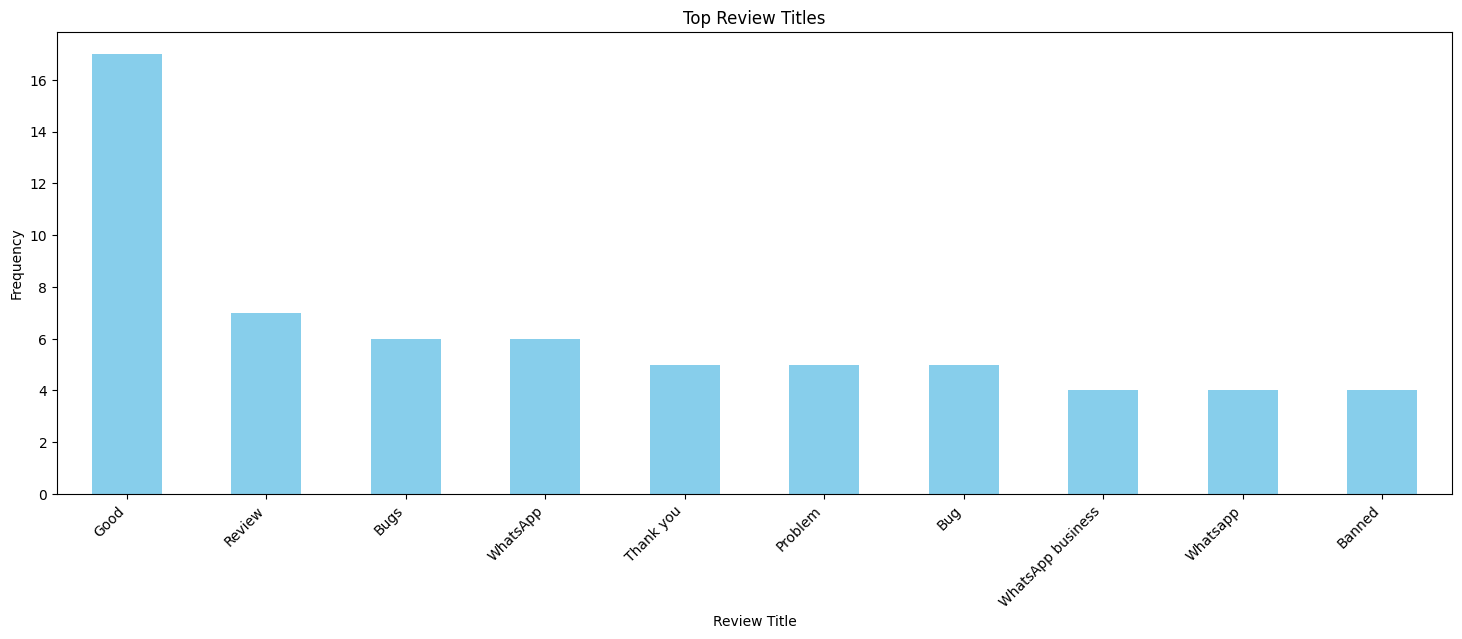

In [21]:
# Top review titles
top_titles = df['title'].value_counts().head(10)

# Visualize top review titles
plt.figure(figsize=(18, 6))
top_titles.plot(kind='bar', color='skyblue')
plt.title('Top Review Titles')
plt.xlabel('Review Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Extract sample of reviews corresponding to top titles
top_title_reviews = df[df['title'].isin(top_titles.index)]

<h2 style="font-family:Comic Sans MS; color:#2bb5bd">6. Sentiment Analysis</h2>

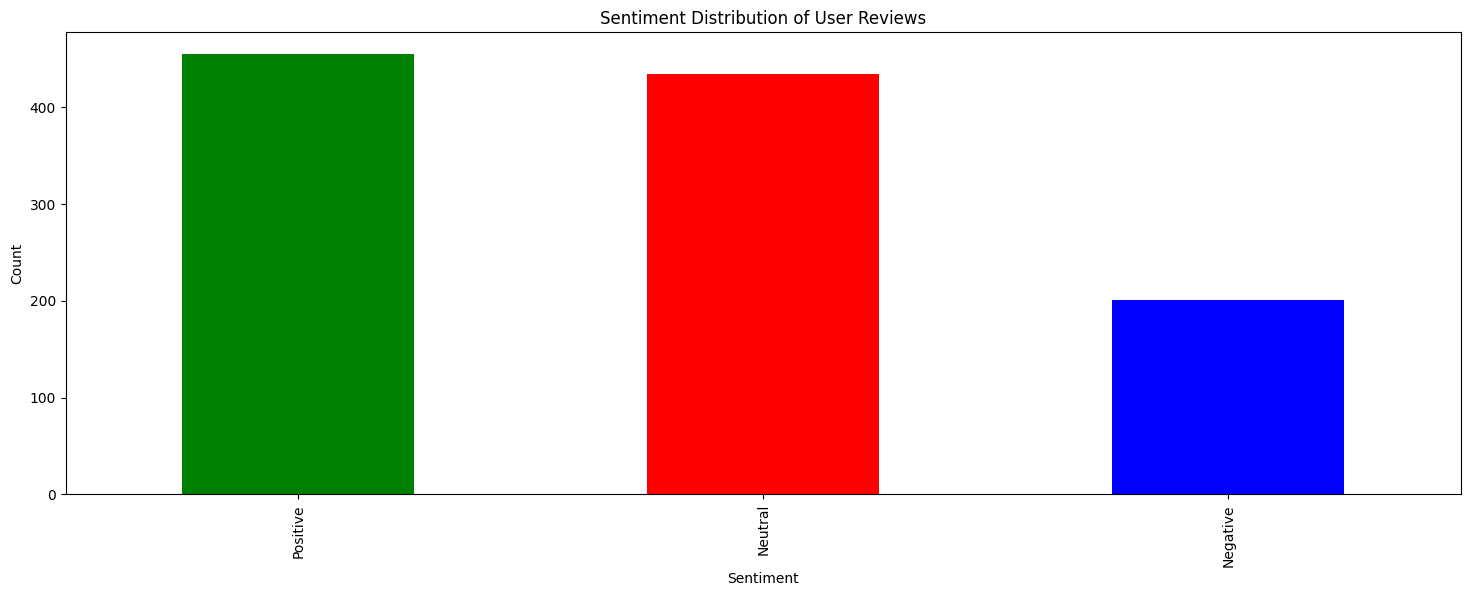

In [25]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each review text
df['Sentiment'] = df['text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(18, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of User Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

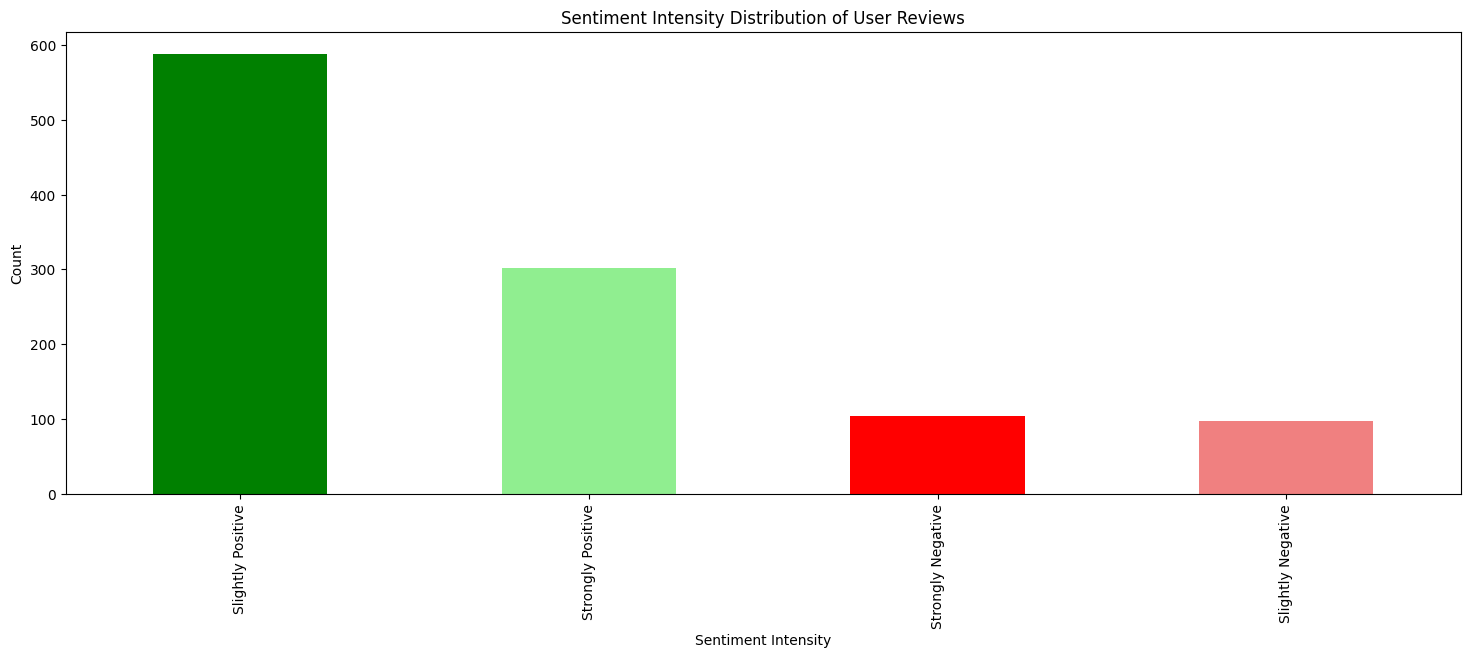

In [26]:
# Function to get sentiment polarity intensity
def get_sentiment_intensity(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.2:
        return 'Strongly Positive'
    elif 0 <= polarity <= 0.2:
        return 'Slightly Positive'
    elif -0.2 <= polarity < 0:
        return 'Slightly Negative'
    elif polarity < -0.2:
        return 'Strongly Negative'
    else:
        return 'Neutral'

# Apply sentiment intensity analysis to each review text
df['Sentiment_Intensity'] = df['text'].apply(get_sentiment_intensity)

# Visualize sentiment intensity distribution
plt.figure(figsize=(18, 6))
df['Sentiment_Intensity'].value_counts().plot(kind='bar', color=['green', 'lightgreen','red','lightcoral'])
plt.title('Sentiment Intensity Distribution of User Reviews')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Count')
plt.show()

In [27]:
# Example: Analyze most mentioned features in positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Example: Get top mentioned features in positive reviews
positive_feature_counts = positive_reviews['text'].str.lower().str.split(expand=True).stack().value_counts()
top_positive_features = positive_feature_counts.head(10)

# Example: Get top mentioned features in negative reviews
negative_feature_counts = negative_reviews['text'].str.lower().str.split(expand=True).stack().value_counts()
top_negative_features = negative_feature_counts.head(10)

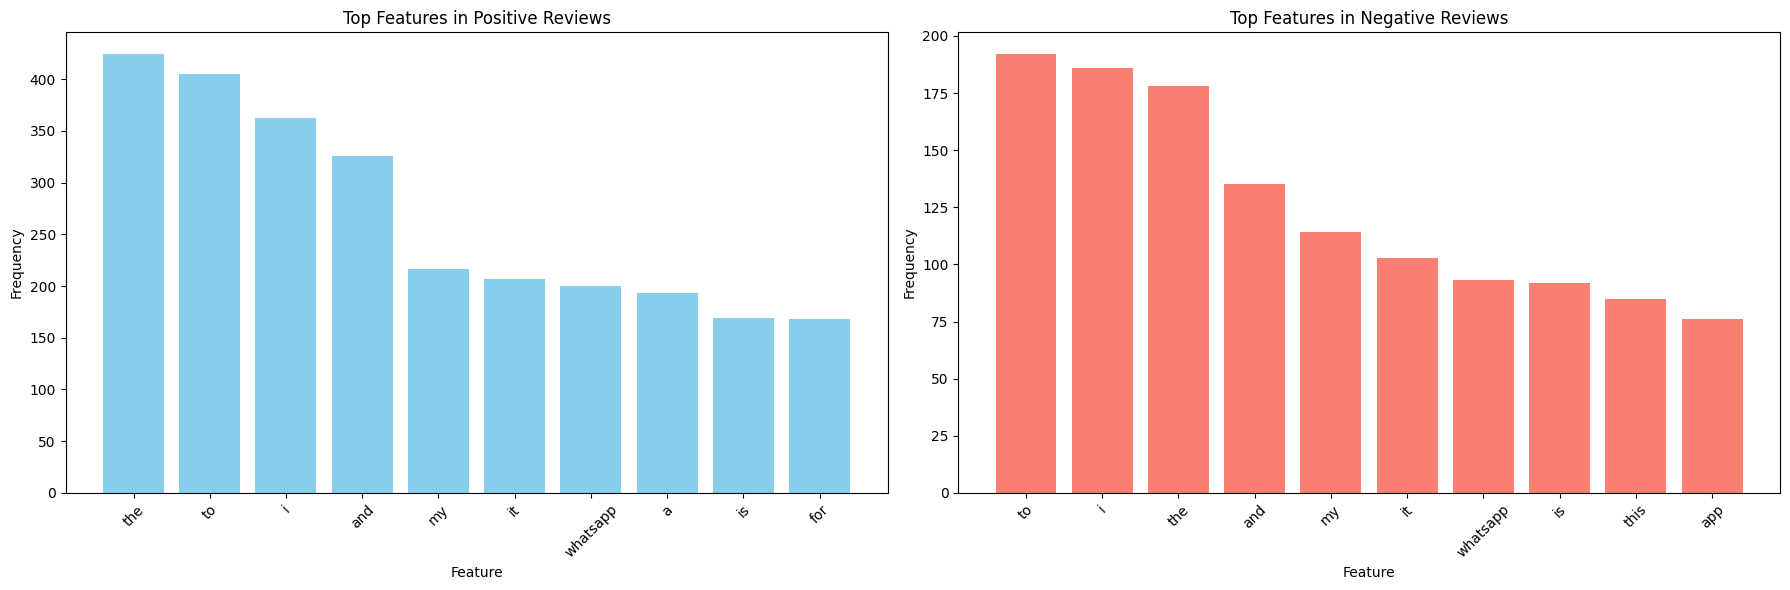

In [28]:
# Create subplots for positive and negative reviews
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot top mentioned features in positive reviews
axes[0].bar(top_positive_features.index, top_positive_features.values, color='skyblue')
axes[0].set_title('Top Features in Positive Reviews')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45) 

# Plot top mentioned features in negative reviews
axes[1].bar(top_negative_features.index, top_negative_features.values, color='salmon')
axes[1].set_title('Top Features in Negative Reviews')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()
plt.show()

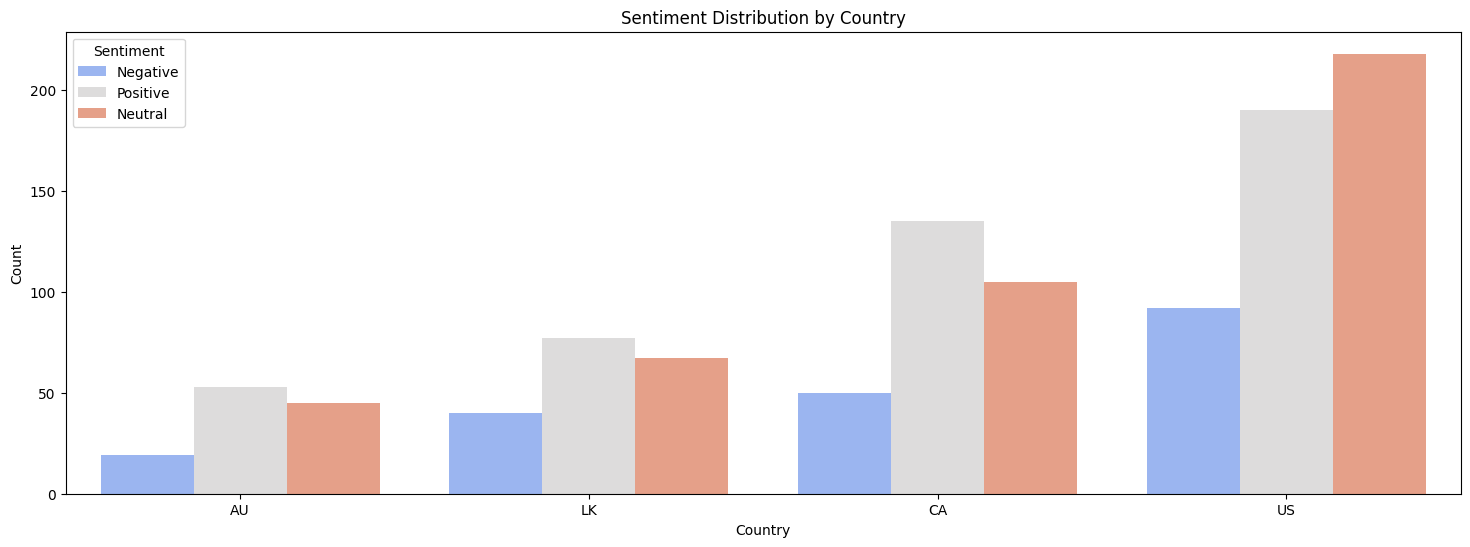

In [29]:
# Example: Analyze sentiment distribution by country
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='country', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [30]:
# Example: Analyze correlation between user rating and sentiment polarity
# For illustration purposes, using 'score' column as user rating and 'Sentiment_Polarity' column as sentiment polarity
df['Sentiment_Polarity'] = df['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Calculate correlation
rating_sentiment_corr = df[['score', 'Sentiment_Polarity']].corr()

# Print correlation matrix
print("Correlation Matrix between User Rating and Sentiment Polarity:")
print(rating_sentiment_corr)

Correlation Matrix between User Rating and Sentiment Polarity:
                       score  Sentiment_Polarity
score               1.000000            0.412304
Sentiment_Polarity  0.412304            1.000000


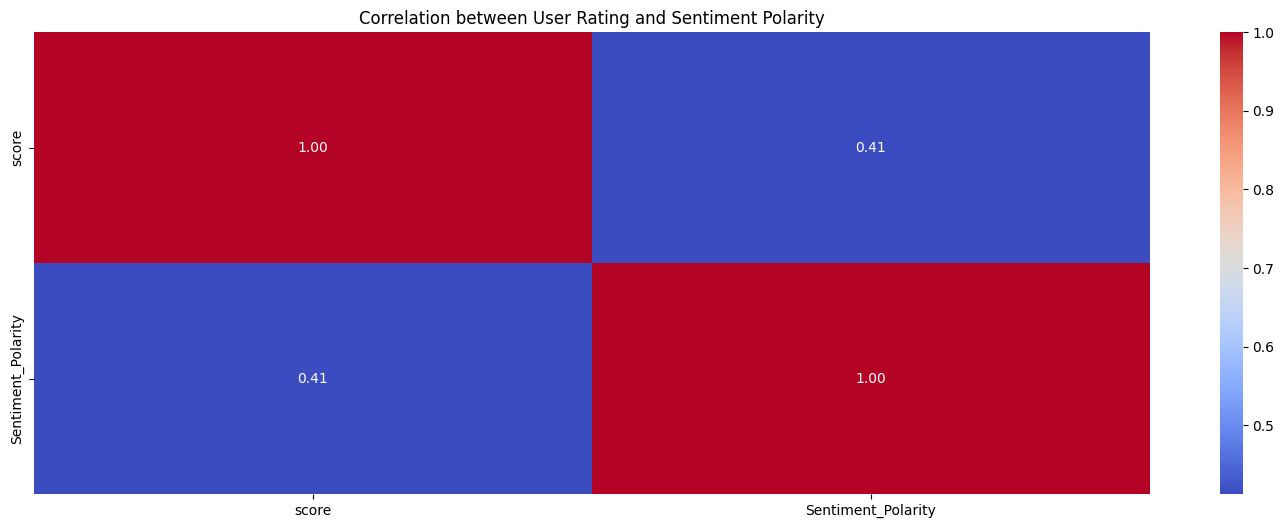

In [31]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(18, 6))
sns.heatmap(rating_sentiment_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between User Rating and Sentiment Polarity')
plt.show()